
# MLG382 GROUP PROJECT  [100 Marks] 
**Lecturer: _K. Igwe_**


# Your task is to predict *median house values* in Western cape, given a number of features from the districts 


The first question to ask before building a model is what exactly the business objective is. How does the client expect to use and benefit from the model? The objective is important in determining how you will frame the problem, the algorithms to select, the performance measure to use for your model evaluation, and the level of effort you will spend tweaking your model.

In this project, you should assume that your model’s output (a prediction of a district’s median housing price) will be fed to
another Machine Learning system along with many other determinats to better understand the risk of investing in a given area of the Western Cape. The data (home.csv) are provided alonside this notebook. 

This checklist can guide you through the projects.
1. Frame the problem and look at the big picture (done for you).
2. Get the data (made available for you).
3. Explore the data to gain insights.
4. Prepare the data to better expose the underlying data patterns to Machine Learning algorithms.
5. Explore many different models and shortlist the best ones.
6. Fine-tune your models and combine them into a great solution.
7. Present your solution.

### Aim
- Lecturers aim: To expose you to practical applications of ML. 
- Your aim:  to predict median house values in Western cape, given a number of features from the province. 

### Skills Tested
- Basic Python Programming
- EDA
- Use of sklearn Library
- choosing the right model and Building a classification Model
- Understanding and using different evaluation techniques
- Reporting 

### Instructions and Directions
1. _**your code here**_  or  _**your answer here**_ need to be deleted and replaced with your code or answer
2. You may use more than one cell to answer a question
3. Ensure that you include appropriate comment
4. If your code requires special instruction or dependencies to run, please provide these in your submission 

### NOTE: 80% is for meeting requirement, 20% will be awarded based on extra work. I have provided some guide where I enticipate that you may need extra help.

# GROUP MEMBERS:
#### Werner Pretorius
#### Zandrei Kleynhans
#### Lourens Geyser
#### De Wet Kirsten
#### Gideon Rossouw

## RUBRIC

1. Frame the problem and look at the big picture (done for you).
2. Get the data (made available for you).
3. Explore the data to gain insights.
4. Prepare the data to better expose the underlying data patterns to Machine Learning algorithms.
5. Explore many different models (at least 3) and shortlist the best ones.
6. Fine-tune your models.
7. Present your solution.

##  Frame the problem and look at the big picture (done for you).

In [527]:
# Nothing Required here. Good Luck!

# Imports

In [528]:
# Maths Stuff
import pandas as pd
import numpy as np
from scipy import stats as st

# Plotting Stuff
from matplotlib import pyplot as plt
import seaborn as sns

# Preprocessing Stuff
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Performance Metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data

# To calculate class weights => combat label imbalance
from sklearn.utils.class_weight import compute_class_weight

## Get the data (made available for you) [0].

#### First things first, let's import the CSV to get a feel of our dataset

In [529]:
#loading the dataset
home_data = pd.read_csv("home.csv")

# Gives description of the statistical properties of the dataset 
print(home_data.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

## Doctor the dataset

### imputation of NaN's and Duplicates

In [530]:
#here we see were NaN value are distributed
null_percentage = home_data.isnull().sum()/len(home_data)*100
print(null_percentage)

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64


### explain why we dropped bedrooms

In [531]:
# Here we drop the total_bedrooms column
home_data=home_data.drop(columns=['total_bedrooms'])

In [532]:
# Here we remove duplicates
home_data.drop_duplicates(inplace=True)

#here we see were NaN value are distributed
null_percentage = home_data.isnull().sum()/len(home_data)*100
print(null_percentage)

longitude             0.0
latitude              0.0
housing_median_age    0.0
total_rooms           0.0
population            0.0
households            0.0
median_income         0.0
median_house_value    0.0
ocean_proximity       0.0
dtype: float64


## Explore the data to gain insights [10] BONUS [5]

#### hints!
- check for correlations: features with the label. And features with one another
- use graphs to illustrate similarities and differences as you deem neccessary
- NOTE: Features with non-linear relationships will have little or no correlation but may still be very instrumental in your predictions
- Test combinations of features (for example, new feature = old_feature1/old_feature2 )

### A bit of One-Hot Encoding on Ocean Proximity => Because our machines speak in 1's and 0's, not words.

few categories => OHE is most appropriate $$$$$$

In [533]:
print(home_data["ocean_proximity"].value_counts())

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


In [534]:
# use dummies to create one new column for every category => creates DataFrame
ohe_prox = pd.get_dummies(home_data["ocean_proximity"])

# add to existing dataset
home_data = home_data.join(ohe_prox).drop(columns=["ocean_proximity"])



## Dealing with outliers

### Remove Outliers

In [535]:
# Get first quartile
#Q1 = home_data.quantile(0.25)

# Get third quartile
#Q3 = home_data.quantile(0.75)

# Calculate IQR
#IQR = Q3 - Q1

# Replace Home_Data without any outliers, effectively removing rows that contain outliers
#home_data = home_data[((home_data < (Q1 - 1.5 * IQR)) | (home_data > (Q3 + 1.5 * IQR))).any(axis=1)]

### Replace Outliers with median

In [536]:
# Loops through each column in the dataset
#for column in home_data.columns:

    # Get first quartile
    #p1 = np.percentile(home_data[column], 25)
    
    # Get third quartile
    #p2 = np.percentile(home_data[column], 75)
    
    # Calculate IQR
    #iqr = p2 - p1
    
    # Replace Outliers with median
    #home_data[column] = home_data[column].apply(lambda x: np.median(x) if x <= p1-1.5*iqr or x >= p2+1.5*iqr else x)

## Filter method

### First we must visualise the Feature to Feature Correlations

<AxesSubplot:>

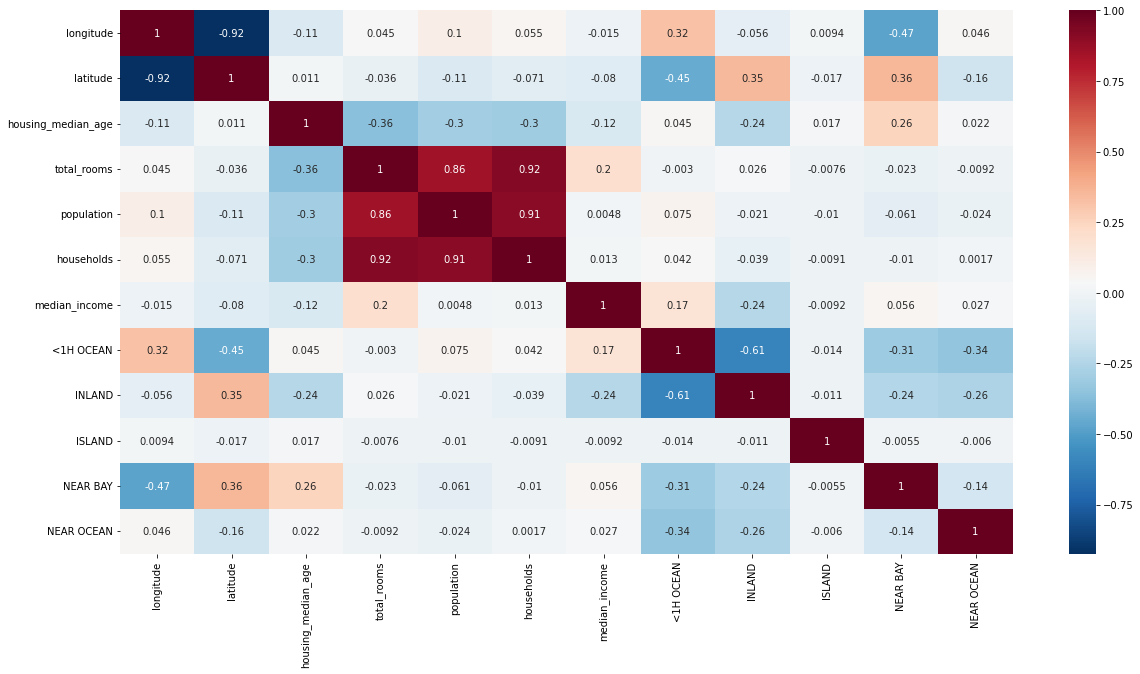

In [537]:
# first we build a matrix that contains the Pearson Correlation Coefficient (PCC) between features with reference to the labels
corr_matrix_feats = home_data.drop(columns=["median_house_value"]).corr()

# next, we isolate the feature column in the matrix that corresponds to the labels
plt.figure(figsize=(20, 10))

# then generate a heatmap to see the correlations of features against the labels => based on the data we just isolated
sns.heatmap(corr_matrix_feats, annot = True, cmap = "RdBu_r")



### Log transform

#### 33333333333333333333333333333333333333

longitude


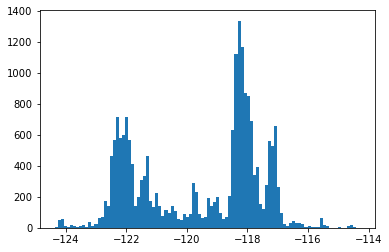

latitude


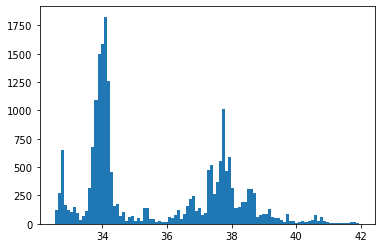

housing_median_age


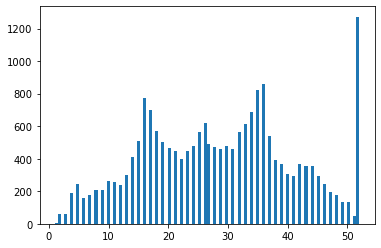

total_rooms


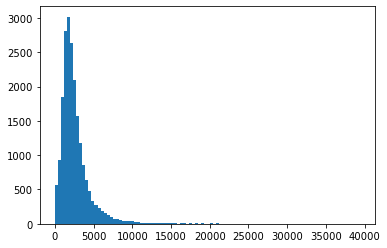

population


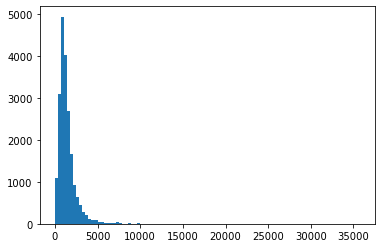

households


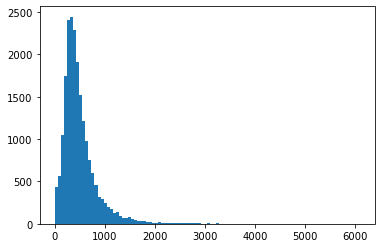

median_income


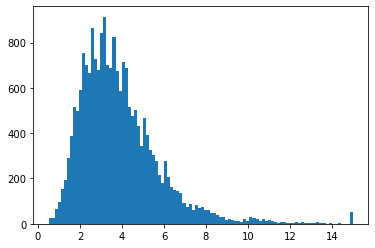

median_house_value


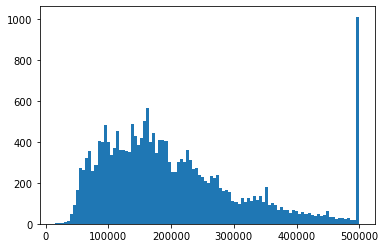

In [538]:
# Loop through each column and plot histogram
for column in home_data.drop(columns = ohe_prox.columns).columns:
    print(column)
    plt.hist(home_data[column], bins = 100)
    plt.show()    

    

#### $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$

total_rooms


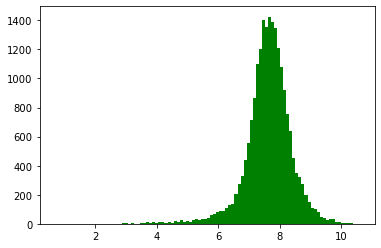

population


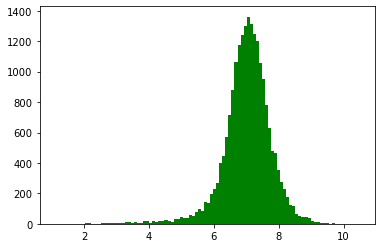

households


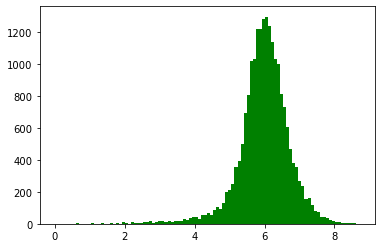

median_income


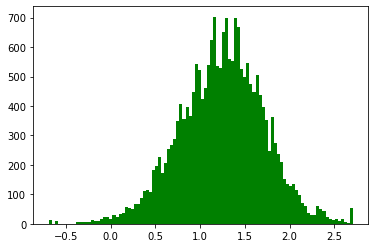

In [539]:
# Loop through each column and plot histogram
for column in ['total_rooms','population','households','median_income']:
    print(column)
    plt.hist(np.log(home_data[column]), bins = 100,color='g')
    plt.show()   

#### $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$

In [540]:
# Replace column with loged transformed column
#for column in ['total_rooms','population','households','median_income']:
    #home_data[column] =  np.log(home_data[column])

#### Next, we visualise the Feature to Target Correlation

<AxesSubplot:>

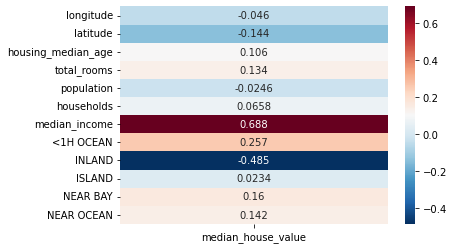

In [541]:
# first we build a matrix that contains the Pearson Correlation Coefficient (PCC) between features with reference to the labels
corr_matrix = home_data.corr()

# next, we isolate the feature column in the matrix that corresponds to the labels
corr_matrix_labels = corr_matrix[["median_house_value"]].drop(labels=["median_house_value"])

# then generate a heatmap to see the correlations of features against the labels => based on the data we just isolated
sns.heatmap(corr_matrix_labels, annot = True, fmt="0.3", cmap = "RdBu_r")

## Prepare the data to better expose the underlying data patterns to Machine Learning algorithms [20]

#### hint!
- remove the corresponding districts.
- remember to deal with th NA's (you can as well do this before now)
- Scale, Normalize, transform some features (e.g., median income can be put into categroies).
- Set the values to some value (zero, the mean, the median, etc.).


#### Remove Features with High Feature to Feature Correlarion

In [542]:
# Obtain features with their scores
scores = corr_matrix_labels.reset_index()


# order the scores in descending order
scores_ordered = scores.reindex(scores["median_house_value"].abs().sort_values(ascending=False).index)


scores_ordered = scores_ordered[:10]

# Assess the Correlations and decise on which Redundant Columns to drop => pass string names into list
redundancies = ['longitude','total_rooms','total_bedrooms','population']

# get the ordered feature names
features_ordered = list(scores_ordered["index"])

for item in redundancies:
    try:
        features_ordered.remove(item)
    except:
        pass

# Drop those redundant columns
features_cleaned = [feature for feature in features_ordered if feature not in redundancies]

# gather all those cleaned features into a dataframe
features_df = home_data[features_cleaned]

# lets bring everything together => just to make sure our features and targets are still on the same page
home_cleaned = features_df.join(home_data["median_house_value"])

print(home_cleaned.columns)

best =['median_income','INLAND', '<1H OCEAN','total_rooms', 'housing_median_age','total_bedrooms']

Index(['median_income', 'INLAND', '<1H OCEAN', 'NEAR BAY', 'latitude',
       'NEAR OCEAN', 'housing_median_age', 'households', 'median_house_value'],
      dtype='object')


In [543]:
features = home_cleaned.drop(columns=["median_house_value"])
labels = home_cleaned["median_house_value"]
features=StandardScaler().fit_transform(features)
#features = MinMaxScaler().fit_transform(features)

In [544]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, train_size = 0.80)

In [545]:
liner = LinearRegression().fit(x_train, y_train)
y_pred = liner.predict(x_test)

In [546]:
from sklearn.metrics import r2_score
y_act_y_pre = pd.DataFrame({" Actual": y_test,"Predicted": y_pred})
print(y_act_y_pre.head(20))
print(r2_score(y_test,y_pred))
print(liner.score(x_test,y_test))
print(mean_squared_error(y_test, y_pred))

        Actual      Predicted
13982    53300  101316.016312
2525     71900   92616.535386
12984   143000  177393.280890
731     179300  263549.991322
12801    60900   97279.610574
14152   291500  215959.827675
4624    500001  317739.994406
4161    152200  182350.344126
9397    389200  247443.714055
3817    215800  276243.858265
11969   152200  157321.197431
3712    181300  218037.282801
5807    175000  162156.398194
3392    219900  283382.816560
2608     98800  188349.165034
12383   121300  141567.350830
17051   314100  300101.513733
15415    90800  126084.208813
15427   127200  128320.923647
10981   229600  237838.504755
0.5888603260311936
0.5888603260311936
5419924339.129374


 ## Explore many different models (at least 3) and shortlist the best ones [20] Bonus [5]

#### hint!
- Some with cross_validation
- Tree based models
- Non- Tree based Models
- (don't worry too much about tuning here) => we did worry (Werner, Zandrei : 2022/5/6 @ 22:09)

In [547]:
labels_bin = labels.apply(lambda x: 1 if x >= np.median(labels) else 0 )
print(labels_bin.value_counts())

from sklearn.feature_selection import RFE

selector = RFE(LogisticRegression(), n_features_to_select=6, step=1).fit(features, labels_bin)

print(selector.ranking_)

1    10325
0    10315
Name: median_house_value, dtype: int64
[1 1 1 1 3 1 2 1]


In [548]:
feats = MinMaxScaler().fit_transform(home_cleaned.drop['median_house_value'])
x_train, x_test, y_train, y_test = train_test_split(feats, labels_bin, train_size = 0.8)

TypeError: 'method' object is not subscriptable

In [ ]:
home_cleaned


In [ ]:
logger = LogisticRegression().fit(x_train, y_train)

y_pred = logger.predict(x_test)

print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))


fpr, tpr, thresholds = roc_curve(y_pred, y_test)
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
y_act_y_pre = pd.DataFrame({" Actual": y_test,
                           "Predicted": y_pred})
print(y_act_y_pre.head(30))

In [ ]:
rando = RandomForestClassifier(1000).fit(x_train, y_train)
y_pred = rando.predict(x_test)
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

In [ ]:

perco = Perceptron(max_iter = 1000).fit(x_train, y_train)
y_pred = perco.predict(x_test)

print(classification_report(y_test, y_pred))

 ## Fine-tune your models [10] BONUS [10]

#### hint!
- We manually tuned our model in the class (this is not efficient)

try:
- GridSearchCV from sklearn (self-improvement)
- esemble methods
- evaluate your models on the test set

In [ ]:
# _your code here_

## Present your solution [20].

#### hint!
- you do not need machine learning knowledge to write a report
- Report your choosen solution and justify it

In [ ]:
# _your Report here_

### ADVISE: Let your objective not be to obtain marks but to understand, experiment and experience! 

### Congratulations! You have achieved a lot if you have completed this project deligently